## Diabetic Retinopathy Debrecen Dataset 

The goal for this analysis is to implement the Naive Bayes and KNN classifers to predict if patients have diabetic retinopathy or not. The dataset contains 1151 instances and 20 attributes (categorical and continuous) and can be found [here](http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set).

### Set up Environment 

In [1]:
# import libraries 
import warnings
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

%matplotlib inline
warnings.simplefilter("ignore")

### Read in Data 

In [2]:
# create list w column names 
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('eu_dist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

# read in data, add column names 
data = pd.read_csv("messidor_features.txt", names = col_names)

# preview data 
print(data.info())

data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   quality     1151 non-null   int64  
 1   prescreen   1151 non-null   int64  
 2   ma2         1151 non-null   int64  
 3   ma3         1151 non-null   int64  
 4   ma4         1151 non-null   int64  
 5   ma5         1151 non-null   int64  
 6   ma6         1151 non-null   int64  
 7   ma7         1151 non-null   int64  
 8   exudate8    1151 non-null   float64
 9   exudate9    1151 non-null   float64
 10  exudate10   1151 non-null   float64
 11  exudate11   1151 non-null   float64
 12  exudate12   1151 non-null   float64
 13  exudate13   1151 non-null   float64
 14  exudate14   1151 non-null   float64
 15  exudate15   1151 non-null   float64
 16  eu_dist     1151 non-null   float64
 17  diameter    1151 non-null   float64
 18  amfm_class  1151 non-null   int64  
 19  label       1151 non-null  

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,eu_dist,diameter,amfm_class,label
875,1,0,34,34,34,33,31,28,13.632699,7.576963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.507159,0.116663,0,0
677,1,1,56,56,56,54,49,25,52.972626,21.611270,8.145465,1.110534,0.041819,0.000000,0.000000,0.000000,0.517072,0.128556,0,0
16,1,1,105,95,81,66,46,32,123.053484,70.571010,37.409891,19.937253,14.786668,6.114911,2.345740,1.002243,0.524461,0.134247,1,1
868,1,1,42,42,38,34,29,22,188.842000,109.620980,42.257684,4.227210,0.154783,0.023073,0.001923,0.000961,0.512692,0.093254,1,1
157,1,1,47,45,45,42,36,26,28.504500,7.675472,1.572641,0.081556,0.000000,0.000000,0.000000,0.000000,0.512511,0.135413,0,1
848,1,1,64,61,59,52,49,42,32.155976,17.636109,7.703571,1.426416,0.110909,0.009242,0.000000,0.000000,0.515891,0.092424,0,0
249,1,1,32,32,32,30,27,20,6.216010,1.987275,0.050837,0.000000,0.000000,0.000000,0.000000,0.000000,0.534695,0.095512,0,0
1045,1,1,24,24,21,20,17,10,112.316034,54.790166,16.021863,2.053484,0.317197,0.074175,0.036112,0.006832,0.522596,0.101503,1,0
408,1,1,105,97,88,77,66,43,20.800481,5.016614,1.363411,0.216976,0.009233,0.001539,0.001539,0.001539,0.555425,0.112335,0,1
795,1,1,34,34,34,31,26,19,51.733169,20.030529,6.301271,0.873245,0.064914,0.000000,0.000000,0.000000,0.483298,0.125191,0,0


### Naive Bayes Classifier 

The Naive Bayes (NB) classifier is based on the application of the Bayes' theory and assumes a strong independence between features. The Gaussian Naive Bayes algorithm estimates the features using a Gaussian distribution. 

In [3]:
# separate features and labels 
labels = data['label']
features = data.drop(['label'], axis = 1) 

# check shape
print(labels.shape)
print(features.shape)

(1151,)
(1151, 19)


In [4]:
# create naive bayes 
gnb = GaussianNB()

# get cv scores 
cv_scores = cross_val_score(gnb, features, labels, scoring='accuracy', cv=10)

# print results 
print('accuracy:', cv_scores.mean())

accuracy: 0.5977286356821588


The model above came out to about 60% accurate. Now, let's look at the confusion matrix and classification report to asses how the model more in depth.  

#### Confusion Matrix and Classification Report 

In [5]:
# nb predictions 
predict = cross_val_predict(gnb, features, labels, cv=10) 

# confusion matrix 
cmat = confusion_matrix(labels, predict) 

# classification report
nbreport = classification_report(labels, predict) 

# print results 
print('confusion matrix:\n', cmat) 
print('\nclassification report:\n\n', nbreport) 

confusion matrix:
 [[502  38]
 [425 186]]

classification report:

               precision    recall  f1-score   support

           0       0.54      0.93      0.68       540
           1       0.83      0.30      0.45       611

    accuracy                           0.60      1151
   macro avg       0.69      0.62      0.56      1151
weighted avg       0.69      0.60      0.56      1151



From our confusion matrix and classification report, we can see the precision, recall, and F1-score. Precision represents the percent of our predictions that were correct and recall represents the percent of positive cases that we identified correctly. The F1-score summarizes both precision and recal into one metric and the closer the F1-score is to 1, the better the model is.

#### Receiver Operating Characteristic (ROC) Curve

Next, let's look at our Receiver Operating Characteristic (ROC) curve. Generating this curve is a great method to see how a predictive model can distinguish between true positives and true negatives. 

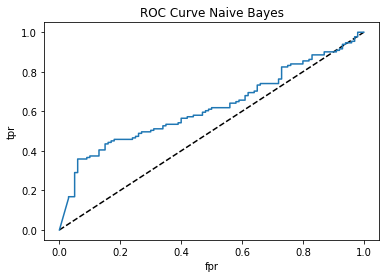

Area Under Curve (AUC): 0.6211068702290077


In [6]:
# split data into train/test sets 
ltrain, ltest, ftrain, ftest = train_test_split(labels, features, test_size=0.20)

# fit data to nb 
gnb.fit(ftrain, ltrain) 

# get probability estimates 
proba = gnb.predict_proba(ftest) 

# generate roc curve + auc 
fpr, tpr, thresh = roc_curve(ltest, proba[:, 1])
auc = roc_auc_score(ltest, proba[:, 1])

# plot ROC curve + print auc 
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

print('Area Under Curve (AUC):', auc) 

Our reported AUC is around 0.62, which is considered not the best given that 0.5 denotes a bad classifier and 1 denotes a percet classifier. 

### K-Nearest Neighbor (KNN) Classifier

The KNN Classifier consists of a training stage and a test stage. In the training stage, the classifier takes the training data and memorizes it. In the test stage, the classifier compares the test data with the training data and returns maximum occuring label of the k-nearest data points. For this classifier, Euclidean distance will be used as the distance metric. 

For NB, the data did not need to be scaled, but it is critical for KNN since it is a distance based algorithm and the scale of the data affects it. 

#### Standardize Data 

In [7]:
# create min max scaler 
scaler = MinMaxScaler([0, 1]) 

# standardize data
features_scaled = scaler.fit_transform(features) 

#### KNN Classifier 

In [8]:
# create knn
knn = KNeighborsClassifier(5) 

# fit data 
knn.fit(features_scaled, labels) 

# get cv scores
cv_scores = cross_val_score(knn, features_scaled, labels, scoring='accuracy', cv=10) 

# knn predictions 
predict = cross_val_predict(knn, features_scaled, labels, cv=10)

# get classification report 
knnreport = classification_report(labels, predict) 

# print results 
print('accuracy:', cv_scores.mean())
print('\nclassification report:\n', knnreport)

accuracy: 0.6351124437781108

classification report:
               precision    recall  f1-score   support

           0       0.60      0.65      0.62       540
           1       0.67      0.62      0.64       611

    accuracy                           0.64      1151
   macro avg       0.64      0.64      0.63      1151
weighted avg       0.64      0.64      0.64      1151



Copmpred to the NB algorithm, KNN classification has much better scores overall. However, the F1-scores are still not the best. 

For the previous KNN model, k = 5 was used, but now lets use GridSearchCV to find the best parameters for the model. 

In [9]:
# create knn 
knn = KNeighborsClassifier() 

# set params
params = {'n_neighbors' : [x for x in range(1, 31)]}

# create gridsearchcv
grid_search = GridSearchCV(knn, params, cv=10, scoring='accuracy')

# fit data 
grid_search.fit(features_scaled, labels) 

# print results 
print('best parameters:', grid_search.best_params_)
print('\naccuracy:', grid_search.best_score_) 

best parameters: {'n_neighbors': 23}

accuracy: 0.6602923538230885


Now, lets run the model using n_neighbors = 23. 

In [10]:
# create knn, k = 23
knn = KNeighborsClassifier(23) 

# fit data 
knn.fit(features_scaled, labels) 

# get cv scores
cv_scores = cross_val_score(knn, features_scaled, labels, scoring='accuracy', cv=10) 

# knn predictions 
predict = cross_val_predict(knn, features_scaled, labels, cv=10)

# get classification report 
knnreport = classification_report(labels, predict) 

# print results 
print('accuracy:', cv_scores.mean())
print('\nclassification report:\n', knnreport)

accuracy: 0.6602923538230885

classification report:
               precision    recall  f1-score   support

           0       0.62      0.72      0.67       540
           1       0.71      0.61      0.65       611

    accuracy                           0.66      1151
   macro avg       0.66      0.66      0.66      1151
weighted avg       0.67      0.66      0.66      1151



To take this model a step further, lets perform a nested cross-validation. 

In [11]:
# nested cross validation 
nested_score = cross_val_score(grid_search, features_scaled, labels, cv=10, scoring='accuracy')

# nested cv predictions 
predict = cross_val_predict(grid_search, features_scaled, labels, cv=10)

# get classification report 
ncvreport = classification_report(labels, predict) 

# print results 
print('accuracy:', nested_score.mean())
print('\nclassification report:\n', ncvreport)

accuracy: 0.6550749625187406

classification report:
               precision    recall  f1-score   support

           0       0.61      0.74      0.67       540
           1       0.71      0.58      0.64       611

    accuracy                           0.66      1151
   macro avg       0.66      0.66      0.65      1151
weighted avg       0.67      0.66      0.65      1151



To improve our model, a PCA can be used to reduce the dimensionality of our model. KNN suffers from the curse of dimensionality and can perform poorly in higher dimensions.

When doing cross-validation, a PCA needs to happen inside the cross-validation loop. To do this, a Pipeline needs to be created and passed into a cross-validation. Once created, it and the parameters can be passed into the GridSearchCV to find the best accuracy and parameters.

In [12]:
# create models 
pca = PCA()
knn = KNeighborsClassifier()

# create pca and knn pipeline 
pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])

# set up parameters 
params = {
    'pca__n_components': list(range(1, 19)), # range of components to keep 
    'knn__n_neighbors': list(range(1, 30)),  # range of k values 
    }

# create gridsearchcv
grid_search = GridSearchCV(pipe, params, cv=5, scoring='accuracy') 

# fit data 
grid_search.fit(features_scaled, labels)

# print results 
print('best score:', grid_search.best_score_)
print('\nbest parameters:', grid_search.best_params_) 

best score: 0.6603124411820064

best parameters: {'knn__n_neighbors': 23, 'pca__n_components': 13}


Now, with the best parameters, a GridSearchCV can be passed into another cross-validation loop to do a nested cross-validation and get the accuracy estimate as well as the classification report. 

In [13]:
# nested cross validation 
nested_score = cross_val_score(grid_search, features_scaled, labels, cv=5, scoring='accuracy')

# nested cv predictions 
predict = cross_val_predict(grid_search, features_scaled, labels, cv=5)

# get classification report 
ncvreport = classification_report(labels, predict) 

# print results 
print('accuracy:', nested_score.mean())
print('\nclassification report:\n', ncvreport)

accuracy: 0.6429098437794091

classification report:
               precision    recall  f1-score   support

           0       0.60      0.72      0.65       540
           1       0.70      0.58      0.63       611

    accuracy                           0.64      1151
   macro avg       0.65      0.65      0.64      1151
weighted avg       0.65      0.64      0.64      1151



Overall, the accuracy did not improve much given the optimal parameters. In conclusion, the model is not accurate enough since it woul dbe wrong about 40% of the time. 